# American Census

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [2]:
# Data config
path_to_csv = "adult.csv"


## Load data

In [3]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")


## Helpers

## Data exploration

### Question 1

In [4]:
print(X_train.head())

print(X_train.describe)

X_train.isnull().sum()

print(np.where(X_train['occupation'].isnull())[0])
print(np.where(X_train['workclass'].isna())[0])

for i in range(len(X_train.columns)):
    print(X_train[X_train.columns[i]].value_counts())


   age  education-num  hours-per-week     workclass      education  \
0   30            9.0              40       Private        HS-grad   
1   77           10.0               6           NaN   Some-college   
2   44           12.0              50       Private     Assoc-acdm   
3   53           10.0              50       Private   Some-college   
4   41           10.0              40   Federal-gov   Some-college   

        marital-status         occupation    relationship  \
0   Married-civ-spouse              Sales       Own-child   
1   Married-civ-spouse                NaN         Husband   
2        Never-married     Prof-specialty       Unmarried   
3        Never-married       Adm-clerical   Not-in-family   
4   Married-civ-spouse   Transport-moving            Wife   

                  race      sex  native-country  
0   Asian-Pac-Islander   Female   United-States  
1                White     Male   United-States  
2                Black   Female   United-States  
3           

### Question 2

In [5]:
print("This question is answered in the report.")

This question is answered in the report.


## Data exploration

### Question 1

In [6]:
X_train.isnull().sum()
print(len(X_train))

indices_of_nan = np.array(np.where(X_train.isna())[0])

indices_of_nan = np.unique(indices_of_nan, axis=0)

print(len(y_train))
y_train = y_train.drop(index=indices_of_nan)
print(len(y_train))
X_train = X_train.dropna()

X_train.isnull().sum()
print(len(X_train))

X_test.isnull().sum()

16280
16280
14707
14707


age               0
education-num     0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

### Question 2

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# select columns with numerical data types
num_columns_train = X_train.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the numerical columns
num_subset_train = X_train[num_columns_train]
print(num_subset_train)

# select columns with numerical data types
num_columns_test = X_test.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the numerical columns
num_subset_test = X_test[num_columns_test]
print(num_subset_train)

cat_columns_train = X_train.select_dtypes(include=['object']).columns
cat_subset_train = X_train[cat_columns_train]

cat_columns_test = X_test.select_dtypes(include=['object']).columns
cat_subset_test = X_test[cat_columns_test]

       age  education-num  hours-per-week
0       30            9.0              40
2       44           12.0              50
3       53           10.0              50
4       41           10.0              40
5       50           14.0              50
...    ...            ...             ...
16275   31           11.0              30
16276   37           13.0              40
16277   45           14.0              40
16278   32            9.0              40
16279   58            7.0              50

[14707 rows x 3 columns]
       age  education-num  hours-per-week
0       30            9.0              40
2       44           12.0              50
3       53           10.0              50
4       41           10.0              40
5       50           14.0              50
...    ...            ...             ...
16275   31           11.0              30
16276   37           13.0              40
16277   45           14.0              40
16278   32            9.0              40
16279   

### Question 3

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

steps = list()
steps.append(('c', OneHotEncoder(handle_unknown='ignore'), cat_columns_train))
steps.append(('n', MinMaxScaler(), num_columns_train))

# define steps
steps = [('c', OneHotEncoder(handle_unknown='ignore'), cat_columns_train), ('n', MinMaxScaler(), num_columns_train)]
# one hot encode categorical, normalize numerical
ct = ColumnTransformer(steps)

## Experiments

### Question 1

In [14]:
from sklearn.model_selection import train_test_split


# split data
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2,
                                                                random_state=42, shuffle=True, stratify=y_train)

random_state = 42

models = {
    "GaussianNB": GaussianNB(),
    "DummyClassifier": DummyClassifier(strategy="most_frequent"),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    # START ANSWER
    # 𝐄𝐱𝐞𝐫𝐜𝐢𝐬𝐞 1  Extent the list of models with theSVC and LogisticRegression algorithms.
    # Give the SVM a poly kernel. Also, give both algorithms a regularization constant C=0.5 and random_state=42.
    "SVM": SVC(kernel='poly', C=10, random_state=42),
    "LogisticRegression": LogisticRegression(C=10, random_state=42, penalty='none')
    # END ANSWER
}

assert "GaussianNB" in models and isinstance(models["GaussianNB"], GaussianNB), "There is no GaussianNB in models"
assert "DecisionTreeClassifier" in models and isinstance(models["DecisionTreeClassifier"],
                                                         DecisionTreeClassifier), "There is no DecisionTreeClassifier in models"
assert "KNeighborsClassifier" in models and isinstance(models["KNeighborsClassifier"],
                                                       KNeighborsClassifier), "There is no KNeighborsClassifier in models"
assert "SVM" in models and isinstance(models["SVM"], SVC), "There is no SVC in models"
assert "LogisticRegression" in models and isinstance(models["LogisticRegression"],
                                                     LogisticRegression), "There is no LogisticRegression in models"


### Question 2

acc score
>GaussianNB 0.407 (0.013)
f1 score
>GaussianNB 0.382 (0.019)
auc-roc score
>GaussianNB 0.593 (0.006)
acc score
>DummyClassifier 0.750 (0.000)
f1 score
>DummyClassifier 0.643 (0.000)
auc-roc score
>DummyClassifier 0.500 (0.000)
acc score
>DecisionTreeClassifier 0.788 (0.003)
f1 score
>DecisionTreeClassifier 0.780 (0.003)
auc-roc score
>DecisionTreeClassifier 0.684 (0.003)
acc score
>KNeighborsClassifier 0.793 (0.004)
f1 score
>KNeighborsClassifier 0.792 (0.004)
auc-roc score
>KNeighborsClassifier 0.718 (0.003)
acc score
>SVM 0.815 (0.002)
f1 score
>SVM 0.809 (0.003)
auc-roc score
>SVM 0.725 (0.005)
acc score
>LogisticRegression 0.827 (0.001)
f1 score
>LogisticRegression 0.821 (0.000)
auc-roc score
>LogisticRegression 0.738 (0.003)


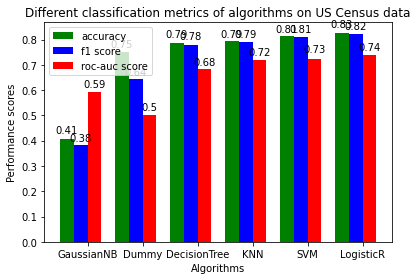

In [16]:
from numpy import mean, std
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score

from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler
from mlxtend.preprocessing import DenseTransformer

accuracy_scores = []
f1_scores = []
roc_auc_scores = []

model_names = []

scoring_method_f1 = make_scorer(lambda prediction, true_target: f1_score(prediction, true_target, average="weighted"))
scoring_method_accuracy = make_scorer(accuracy_score)
scoring_method_roc_auc = make_scorer(roc_auc_score)


# scoring_method_f1 = 'f1'
# # START ANSWER
# scoring_method_accuracy = 'accuracy'


# evaluate a model
def evaluate_model(X, y, model, scorer):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=42)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=6)
    return scores


# evaluate each model
for name, model in models.items():
    # define steps
    steps = list()
    steps.append(('c', OneHotEncoder(handle_unknown='ignore'), cat_columns_train))
    steps.append(('n', MinMaxScaler(), num_columns_train))
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer(steps)
    # wrap the model i a pipeline
    pipeline = Pipeline(steps=[('t', ct), ('to_dense', DenseTransformer()), ('m', model)])
    # evaluate the model and store results
    acc_score = evaluate_model(X_train, y_train.values.ravel(), pipeline, scorer=scoring_method_accuracy)
    accuracy_scores.append(np.mean(acc_score))
    f1 = evaluate_model(X_train, y_train.values.ravel(), pipeline, scorer=scoring_method_f1)
    f1_scores.append(np.mean(f1))
    auc_sco = evaluate_model(X_train, y_train.values.ravel(), pipeline, scorer=scoring_method_roc_auc)
    roc_auc_scores.append(np.mean(auc_sco))
    model_names.append(name)
    # summarize performance
    print("acc score")
    print('>%s %.3f (%.3f)' % (name, mean(acc_score), std(acc_score)))
    print("f1 score")
    print('>%s %.3f (%.3f)' % (name, mean(f1), std(f1)))
    print("auc-roc score")
    print('>%s %.3f (%.3f)' % (name, mean(auc_sco), std(auc_sco)))
# plot the results
# plt.boxplot(accuracy_scores, labels=model_names, showmeans=True)
# plt.show()

# Cross validation plot
fig, ax = plt.subplots()

bar_width = 0.25
X = np.arange(6)

p1 = plt.bar(X + 0.00, accuracy_scores, bar_width, color='g',
             label='accuracy')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + 0.25, f1_scores, bar_width,
             color='b',
             label='f1 score')

# The bar of second plot starts where the first bar ends
p3 = plt.bar(X + 0.50, roc_auc_scores, bar_width,
             color='r',
             label='roc-auc score')

plt.xlabel('Algorithms')
plt.ylabel('Performance scores')
plt.title('Different classification metrics of algorithms on US Census data')
plt.xticks(X + (bar_width + bar_width / 2), (
    'GaussianNB', 'Dummy', 'DecisionTree', 'KNN', 'SVM', 'LogisticR'))
plt.legend()


def autolabel(ps):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in ps:
        height = np.round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(p1)
autolabel(p2)
autolabel(p3)

plt.tight_layout()
plt.show()


### Question 3

In [18]:
from numpy import mean, std
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score

from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from mlxtend.preprocessing import DenseTransformer

grid_accuracy_scores = []
grid_f1_scores = []
grid_roc_auc_scores = []

model_names = []

scoring_method_f1 = make_scorer(lambda prediction, true_target: f1_score(prediction, true_target, average="weighted"))
scoring_method_accuracy = make_scorer(accuracy_score)
scoring_method_roc_auc = make_scorer(roc_auc_score)


# evaluate a model
def evaluate_model_gridsearch(X, y, model, scorer, parameters):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)
    # evaluate model
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=6, verbose=False, scoring=scorer).fit(X, y)
    return grid_search


model_parameters = {
    "GaussianNB": {

    },
    "DummyClassifier": {

    },
    "DecisionTreeClassifier": {
        'DecisionTreeClassifier__random_state': [random_state],
        'DecisionTreeClassifier__max_depth': np.arange(1, 15),
        'DecisionTreeClassifier__min_samples_leaf': np.arange(1, 10)

    },
    # START ANSWER
    "KNeighborsClassifier": {
        'KNeighborsClassifier__n_neighbors': range(1, 10),
        'KNeighborsClassifier__weights': ['uniform', 'distance']
    },
    "SVM": {
        'SVM__random_state': [random_state],
        'SVM__C': np.arange(0.1, 15, 2),
        'SVM__kernel': ['linear', 'poly', 'rbf'],
    },
    "LogisticRegression": {
        'LogisticRegression__random_state': [random_state],
        'LogisticRegression__C': np.arange(0.1, 2, 15),
        'LogisticRegression__penalty': ['l1', 'l2', 'elasticnet', 'none']
    }
    # END ANSWER
}

# evaluate each model
for model_name, parameters in model_parameters.items():
    model = models[model_name]
    # define steps
    steps = list()
    steps.append(('c', OneHotEncoder(handle_unknown='ignore'), cat_columns_train))
    steps.append(('n', MinMaxScaler(), num_columns_train))
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer(steps)
    # wrap the model i a pipeline
    pipeline = Pipeline(steps=[('t', ct), ('to_dense', DenseTransformer()), (model_name, model)])
    # evaluate the model and store results
    grid_search_acc = evaluate_model_gridsearch(X_train, y_train.values.ravel(), pipeline,
                                                scorer=scoring_method_accuracy, parameters=parameters)
    acc_best_model = grid_search_acc.best_estimator_
    acc_best_score = grid_search_acc.best_score_
    acc_best_params = grid_search_acc.best_params_
    grid_accuracy_scores.append(acc_best_score)
    print(model_name)
    print("- acc_best_score =", acc_best_score)
    print("acc_best parameters:")
    for k, v in acc_best_params.items():
        print("-", k, v)

    grid_search_f1 = evaluate_model_gridsearch(X_train, y_train.values.ravel(), pipeline, scorer=scoring_method_f1,
                                               parameters=parameters)
    f1_best_model = grid_search_f1.best_estimator_
    f1_best_score = grid_search_f1.best_score_
    f1_best_params = grid_search_f1.best_params_
    grid_f1_scores.append(f1_best_score)
    print(model_name)
    print("- f1_best_score =", f1_best_score)
    print("f1_best parameters:")
    for k, v in f1_best_params.items():
        print("-", k, v)

    grid_search_roc = evaluate_model_gridsearch(X_train, y_train.values.ravel(), pipeline,
                                                scorer=scoring_method_roc_auc, parameters=parameters)
    roc_best_model = grid_search_roc.best_estimator_
    roc_best_score = grid_search_roc.best_score_
    roc_best_params = grid_search_roc.best_params_
    grid_roc_auc_scores.append(roc_best_score)
    print(model_name)
    print("- roc_best_score =", roc_best_score)
    print("roc_best parameters:")
    for k, v in roc_best_params.items():
        print("-", k, v)

    # f1 = evaluate_model_gridsearch(X_train, y_train.values.ravel(), pipeline, scorer=scoring_method_f1,
    #                                parameters=parameters)
    # f1_scores.append(np.mean(f1))
    # auc_sco = evaluate_model_gridsearch(X_train, y_train.values.ravel(), pipeline, scorer=scoring_method_roc_auc,
    #                                     parameters=parameters)
    # roc_auc_scores.append(np.mean(auc_sco))
    # model_names.append(model_name)
    # # summarize performance
    # print("acc score")
    # print('>%s %.3f (%.3f)' % (name, mean(acc_score), std(acc_score)))
    # print("f1 score")
    # print('>%s %.3f (%.3f)' % (name, mean(f1), std(f1)))
    # print("auc-roc score")
    # print('>%s %.3f (%.3f)' % (name, mean(auc_sco), std(auc_sco)))
# plot the results
# plt.boxplot(accuracy_scores, labels=model_names, showmeans=True)
# plt.show()

# Cross validation plot
fig, ax = plt.subplots()

bar_width = 0.25
X = np.arange(6)

p1 = plt.bar(X + 0.00, grid_accuracy_scores, bar_width, color='c',
             label='accuracy')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + 0.25, grid_f1_scores, bar_width,
             color='m',
             label='f1 score')

# The bar of second plot starts where the first bar ends
p3 = plt.bar(X + 0.50, grid_roc_auc_scores, bar_width,
             color='y',
             label='roc-auc score')

plt.xlabel('Algorithms')
plt.ylabel('Tuned Performance scores')
plt.title('Tuned classification metrics of algorithms on US Census data')
plt.xticks(X + (bar_width + bar_width / 2), (
    'GaussianNB', 'Dummy', 'DecisionTree', 'KNN', 'SVM', 'LogisticR'))
plt.legend()


def autolabel(ps):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in ps:
        height = np.round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(p1)
autolabel(p2)
autolabel(p3)

plt.tight_layout()
plt.show()


GaussianNB
- acc_best_score = 0.41521020513867296
acc_best parameters:
GaussianNB
- f1_best_score = 0.3931021210022136
f1_best parameters:
GaussianNB
- roc_best_score = 0.5978607610357284
roc_best parameters:
DummyClassifier
- acc_best_score = 0.7503229731453603
acc_best parameters:
DummyClassifier
- f1_best_score = 0.6432922070446484
f1_best parameters:
DummyClassifier
- roc_best_score = 0.5
roc_best parameters:


KeyboardInterrupt: 

### Question 4

In [17]:
print("This question is answered in the report.")

This question is answered in the report.


### Question 5

In [19]:
from mlxtend.preprocessing import DenseTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

steps = list()
steps.append(('c', OneHotEncoder(handle_unknown='ignore'), cat_columns_train))
steps.append(('n', MinMaxScaler(), num_columns_train))

ct = ColumnTransformer(steps)

# THIS IS TO DO
# WHat model?
# WHat parameters?
final_clf = LogisticRegression(C=0.1, penalty='none', random_state=42)  # TODO: Include tuned parameters

pipeline = Pipeline(steps=[('t', ct), ('to_dense', DenseTransformer()), ('insert-modelname', final_clf)])

pipeline.fit(X_train, y_train.values.ravel())

final_prediction = pipeline.predict(X_test)

prediction = np.array(final_prediction)  # TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_census.txt", index=False, header=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
